# Lab 3

## Import dependencies

In [16]:
import pandas as pd
import numpy as np
import seaborn as sns

from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

## Read and display data

In [17]:
df = pd.read_csv('lab1.csv')
df

,col_0,col_1,col_2,col_3,col_4,col_5
0,2,65,9,3,6,0
1,2,46,21,12,6,3
2,2,51,20,8,9,3
3,2,28,23,10,9,4
4,2,42,16,8,5,3
...,...,...,...,...,...,...
1451,2,31,19,9,6,4
1452,2,30,7,3,3,1
1453,2,46,5,2,2,1
1454,1,38,9,7,2,0


## DBSCAN Clustering

### Method for standardization data

In [18]:
# def standardize_data(explored_data):
#     return StandardScaler().fit_transform(explored_data)

### Set explored columns 'col_0', 'col_1'

In [19]:
explored_columns = df[['col_0','col_1']]
X = explored_columns

### Fit 'X' on the DBSCAN algorithm

In [20]:
def dbscan(X):
    return DBSCAN(eps=0.3, min_samples=10).fit(X)

### Get unique clusters, outlier with cluster size

In [21]:
def get_unique_clusters(clusters, explored_columns):
    #Create a dataset from explored_columns with 'Cluster' column
    DBSCAN_dataset = explored_columns.copy()
    DBSCAN_dataset.loc[:,'Cluster'] = clusters.labels_ 
    return DBSCAN_dataset.Cluster.value_counts().to_frame()

### DBSCAN & Clusters

In [22]:
clusters = dbscan(X)
get_unique_clusters(clusters, explored_columns)

,Cluster
0,276
-1,239
2,183
3,113
7,110
8,93
4,84
5,65
6,53
14,40


### Visualization of DBSCAN for col_0 (Gender) and col_1 (Age)

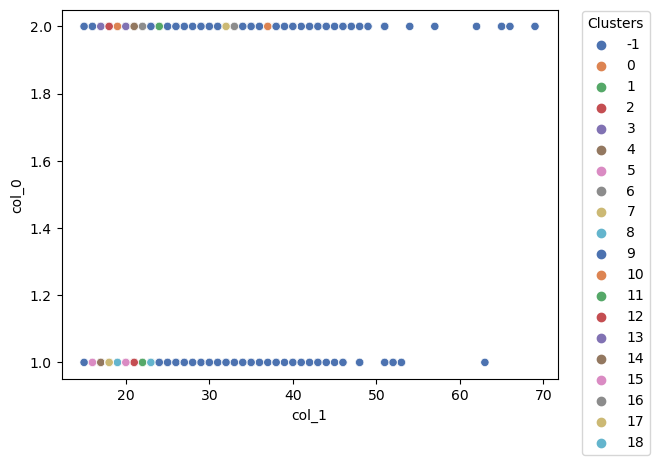

In [23]:
plot = sns.scatterplot(data=explored_columns, x='col_1', y='col_0', hue=clusters.labels_, palette="deep")
sns.move_legend(plot, 'upper right', bbox_to_anchor=(1.2, 1.015), title='Clusters')

### Set explored columns 'col_0', 'col_2'

In [24]:
explored_columns = df[['col_0','col_2']]
X = standardize_data(explored_columns)

### DBSCAN & Clusters

In [25]:
clusters = dbscan(X)
get_unique_clusters(clusters, explored_columns)

,Cluster
0,965
1,481
-1,10


### Visualization of DBSCAN for col_0 (Gender) and col_2 (Smartphone addiction level)

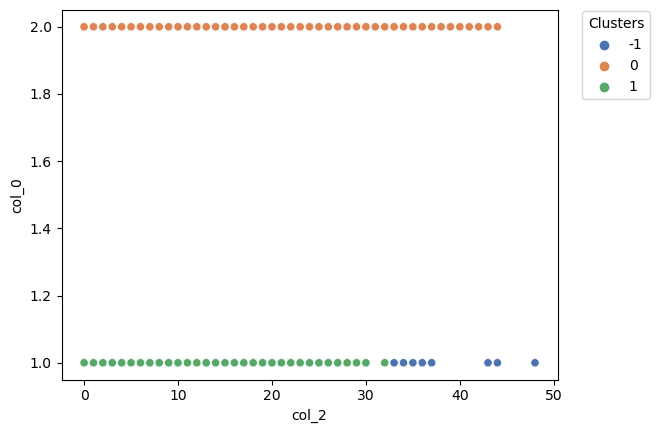

In [26]:
plot = sns.scatterplot(data=explored_columns, x='col_2', y='col_0', hue=clusters.labels_, palette="deep")
sns.move_legend(plot, 'upper right', bbox_to_anchor=(1.2, 1.015), title='Clusters')

### Set explored columns 'col_1', 'col_2'

In [27]:
explored_columns = df[['col_1','col_2']]
X = standardize_data(explored_columns)

### DBSCAN & Clusters

In [28]:
clusters = dbscan(X)
get_unique_clusters(clusters, explored_columns)

,Cluster
0,1355
-1,91
1,10


### Visualization of DBSCAN for col_1(Age) and col_2 (Smartphone addiction level)

## Summary

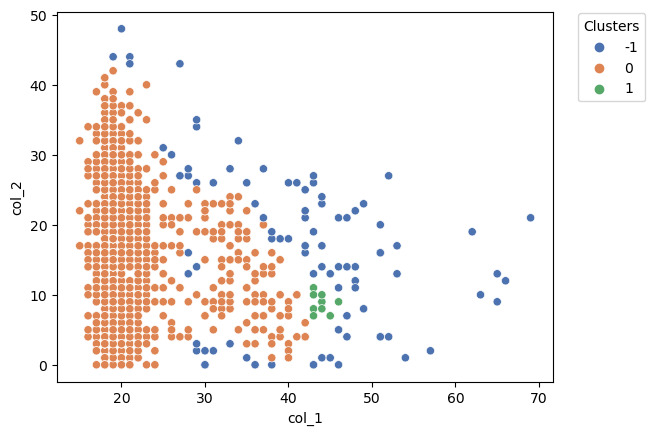

In [29]:
plot = sns.scatterplot(data=explored_columns, x='col_1', y='col_2', hue=clusters.labels_, palette="deep")
sns.move_legend(plot, 'upper right', bbox_to_anchor=(1.2, 1.015), title='Clusters')

В основном для пар характеристик после применения DBSCAN вышло по два основных кластера и одному кластеру в виде шума.

В целом уровень зависимости от смартфона наблюдается у людей от ~15 до ~40 лет. 

Общий уровень зависимости от 0 до примерно ~ 25 у людей в возрасте от ~ 15 до ~ 40. При чем у молодых людей (до ~ 23 лет) колеблется от самого маленького (0) до самого высокого уровня (~ 42). С возрастом уровень зависимости от смартфона постепенно уменьшается.
Есть маленькая группа людей в возрасте от ~ 42 до ~ 46 лет, у которой уровень зависимости в районе +-10.

Если сравнивать пол и возраст, то в целом данные очень схожи: женщины и мужчины в возрасте от ~ 15 до ~ 46. При этом женщин за ~ 45 лет выходит немного больше.

Также общий уровень зависимости от смартфона у мужчин не превышает 30. У женщин выше, доходит до ~ 45.

В целом выходит, что женский пол немного сильнее зависит от смартфонов.